# YELP REVIEW CLASSIFICATION

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 

Photo Credit: https://commons.wikimedia.org/wiki/File:Yelp_Logo.svg


![image.png](attachment:image.png)

### IMPORT DATA AND LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
yelp_df = pd.read_csv('yelp.csv')
yelp_df.head(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


### DATA VISUALIZATION

In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
### Adding length of all the text in a cloumn
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


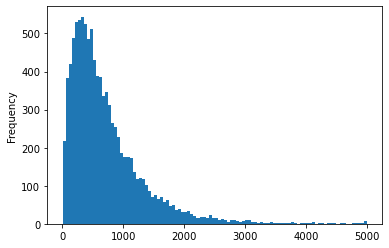

In [10]:
yelp_df.length.plot(bins=100, kind='hist')
plt.show()

In [26]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [31]:
## LONGEST MESSAGE AND SHORTEST MESSAGE
max_val = yelp_df.length.describe()['max']
min_val = yelp_df.length.describe()['min']
mean_val = int(yelp_df.length.describe()['50%'])

text_max = yelp_df[yelp_df['length'] == max_val]['text'].iloc[0]
text_min = yelp_df[yelp_df['length'] == min_val]['text'].iloc[0]
text_mean = yelp_df[yelp_df['length'] == mean_val]['text'].iloc[0]


print('MAX TEXT : ', text_max)
print('\n#########################  ############################\n')
print('MIN TEXT : ', text_min)
print('\n#########################  ############################\n')
print('MEAN TEXT : ', text_mean)

MAX TEXT :  In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. 

Before I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I'm on a constant quest to find that  Ideal expressed in Real Life. 

Vintage 95 isn't quite there, but it's damn close. If I ever give something Five Stars, you'll know it has pegged my Platonic Ideal. Anyway...

The plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.

The location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don't have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I'll stand

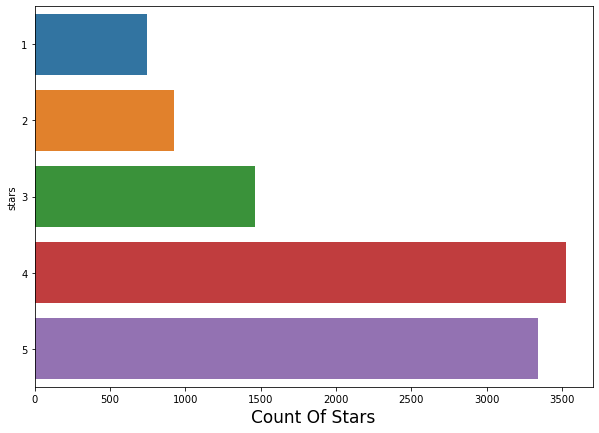

In [32]:
## COUNT OF STARS
plt.figure(figsize=(10, 7))
sns.countplot(y='stars', data=yelp_df)
plt.xlabel('Count Of Stars', fontsize=17)
plt.show()

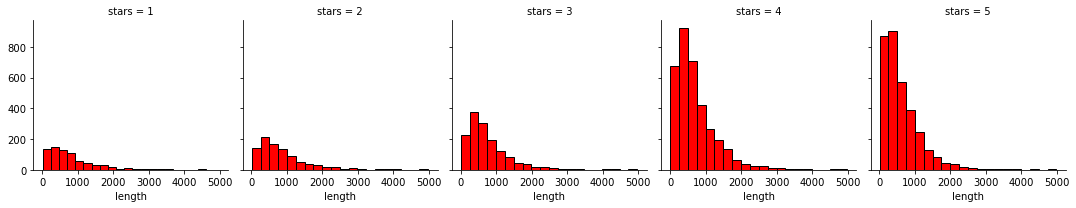

In [37]:
### FACETGRID OF LENGTH AND STARS
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins=20, color='r', ec='black')
plt.show()

In [41]:
## REVIEWS OF 1 and 5 stars

yelp_df_1 = yelp_df[yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]

yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

yelp_df_1_5.sample(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
1022,LMG0zsAkUSscIvmV9vvm3A,2010-12-21,2_aftEi4GMt_tsKIQwheCw,5,My work got some Christmas allowance and inste...,review,Mex8qXT7nR89uTKX_qtgSA,0,0,0,613
7045,IyldfEGfCVcEOb7SMlKs7Q,2010-01-12,wWwK4oB_3YJYHzOEUbMd9Q,5,I LOL just thinking about some of the cast mem...,review,RknsoxpICgtuuv46uaTpyw,1,3,1,536
8761,Trar_9cFAj6wXiXfKfEqZA,2013-01-01,kWe7WzAeLPnz6aBz0RCTeA,5,Bosa Donuts at Southern and Mcklintock in Temp...,review,GyOwPYGX7-ntxcmvK5Ac0g,0,0,0,1677
1720,x_mxrJALBi5No9CxRswEaQ,2011-08-10,Bdfo3Nytyvd5fuV2D3C-Wg,5,"Wow, love that a place like this moved in down...",review,2LdmDvRyrXgFsVL1KoRfRA,0,1,0,397
3086,7O2an_4z_AHg3oczNf7oig,2011-12-01,Nkqaix6Rw9xQN6EBqvsfaA,5,Absolutely incredible. It appears the young la...,review,zLZZpwBNB8hWson5dKXEtg,0,1,0,601
5052,jrZ4CdPKcXtFv_xhV8ThaA,2012-10-29,1VYvIdcIRAotBlYVjw97wA,5,If you are writing poor reviews you obviously ...,review,Z0P7xigz7h6lPqwO0cn2NA,0,0,0,589
1996,Y293fHh5SZ0_9BZm4M6BCg,2011-11-21,vvNDkB7OOjB5eReAau1xJQ,5,I have been going to the Matador since I was l...,review,WcTVz9XL7iRO9CcaNVhFBA,0,0,0,469


In [42]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


1-Star Percentage : 18.33%
5-Star Percentage : 81.67%


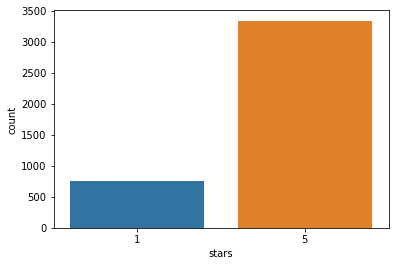

In [45]:
### PERCENTAGES OF 1 and 5 Stars

star1percnt = 100*len(yelp_df_1)/len(yelp_df_1_5)
star5percnt = 100*len(yelp_df_5)/len(yelp_df_1_5)

print('1-Star Percentage : {}%'.format(round(star1percnt, 2)))
print('5-Star Percentage : {}%'.format(round(star5percnt, 2)))

sns.countplot(yelp_df_1_5['stars'])
plt.show()

### CREATING TEST AND TRAIN DATA

#### REMOVE PUNCTUATION

In [46]:
import string
string .punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
test = 'hello #Mr.Future, I am too [happy] to learn AI!'

test_punct_removed = [char for char in test if char not in string.punctuation]
test_punct_removed

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 't',
 'o',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 ' ',
 'A',
 'I']

In [54]:
test_punct_removed = ''.join(test_punct_removed)
test_punct_removed

'hello MrFuture I am too happy to learn AI'

#### REMOVE STOPWORDS

In [2]:
from nltk.corpus import stopwords
stopwords.words('english')

In [56]:
test_punct_removed

'hello MrFuture I am too happy to learn AI'

In [57]:
stopwords_removed = [word for word in test_punct_removed.split() if word.lower() not in stopwords.words('english')]
stopwords_removed

['hello', 'MrFuture', 'happy', 'learn', 'AI']

### MESSAGE CLEANER FUNCTION

In [60]:
def message_clean(message):
    punct_removed = [char for char in message if char not in string.punctuation]
    punct_removed_join = ''.join(punct_removed)
    stopwords_removed = [word for word in punct_removed_join.split() if word.lower() not in stopwords.words('english')]
    return stopwords_removed

In [61]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_clean)
yelp_df_clean.head()

23    [U, go, n, check, car, u, wanna, buy, 1, Thats...
31    [Disgusting, Groupon, daughter, tried, outdate...
35    [Ive, eaten, many, times, none, bad, last, nig...
61    [always, fan, Burlingtons, deals, however, sho...
64    [Another, night, meeting, friends, laugh, Wait...
Name: text, dtype: object

In [62]:
print(yelp_df_clean[0]) # Cleaned Message

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [63]:
print(yelp_df_1_5['text'][0]) # Original Message

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


### COUNT VECTORIZER

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_clean)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [65]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
yelp_countvectorizer.shape

(4086, 26435)

### TRAINING MODEL WITH ALL DATASET

In [67]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values


NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB()

In [68]:
test_sample = ['amazing food! highly recommended for everyone']

test_sample_cv = vectorizer.transform(test_sample)
test_predcit = NB_classifier.predict(test_sample_cv)

test_predcit

array([5], dtype=int64)

In [73]:
test_sample = ['worst food i ever tasted']

test_sample_cv = vectorizer.transform(test_sample)
test_predcit = NB_classifier.predict(test_sample_cv)

test_predcit

array([1], dtype=int64)

### DIVIDING TRAIN TEST

In [90]:
from sklearn.model_selection import train_test_split

X = yelp_countvectorizer
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=47)

In [91]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [92]:
# from sklearn.naive_bayes import GaussianNB
# GNB_classifier = GaussianNB()
# GNB_classifier.fit(X_train.toarray(), y_train)

# GNB_classifier.score(X_train.toarray(), y_train)

# GNB_classifier.score(X_test.toarray(), y_test)

### EVALAUATION OF MODELS

In [93]:
NB_classifier.score(X_train, y_train)

0.9828641370869033

In [94]:
NB_classifier.score(X_test, y_test)

0.910757946210269

In [95]:
from sklearn.metrics import classification_report, confusion_matrix


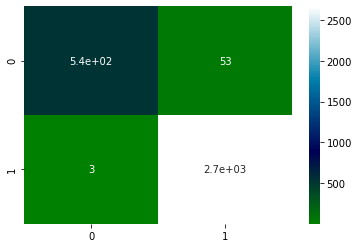

In [96]:
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, cmap='ocean')
plt.show()

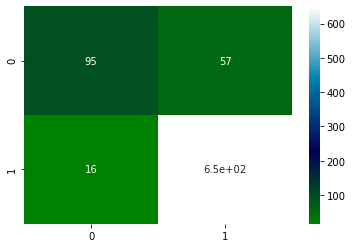

In [97]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='ocean')
plt.show()

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.86      0.62      0.72       152
           5       0.92      0.98      0.95       666

    accuracy                           0.91       818
   macro avg       0.89      0.80      0.83       818
weighted avg       0.91      0.91      0.91       818

